In [2]:
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np

### Creating a new dataset using sklearn's 'make_classification' and converting it into a pandas DataFrame

In [3]:
x,y = make_classification(n_samples = 10000, n_classes= 2, n_features = 2, n_informative = 2, 
                          n_redundant= 0, n_clusters_per_class= 1, random_state = 60);

#print(type(x));print(y)

df = pd.DataFrame(data= x, columns = ['f1', 'f2'])
df['class'] = y
print(df.shape)
df.head(7)

(10000, 3)


,f1,f2,class
0,0.994448,-1.516667,0
1,-0.340479,-0.395461,1
2,-0.929780,-1.448549,1
3,1.726444,-2.539542,0
4,-1.956264,-1.538624,1
5,0.747555,-0.211740,0
6,-1.228424,-1.218711,1


### Splitting the data into Test and Train datasets

In [4]:
from sklearn.model_selection import train_test_split
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.85)
x_test

,f1,f2
154,0.789766,-1.173225
8419,-0.676496,-1.055098
8788,-0.962356,-1.006100
7081,1.622078,-1.233009
9133,0.953611,-2.364206
...,...,...
1555,0.007914,-0.502204
4800,0.862369,-2.352581
5139,-0.995972,-0.683374
7102,-2.400139,-2.009133


In [5]:
print("Shape of Training dataset",x_train.shape);print(y_train.shape)
print("shape of Test dataset", x_test.shape);print(y_test.shape)

Shape of Training dataset (8500, 2)
(8500,)
shape of Test dataset (1500, 2)
(1500,)


In [6]:
import matplotlib.pyplot as plt
import seaborn as sb
from warnings import filterwarnings
filterwarnings(action = 'ignore')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


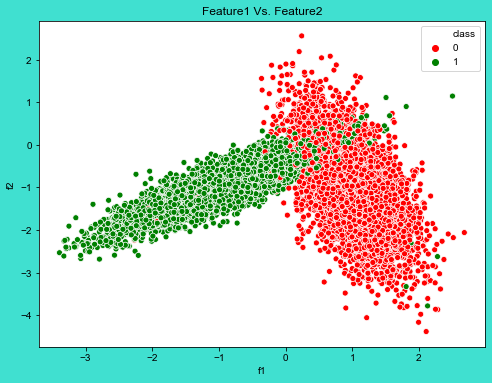

In [7]:
plt.figure(figsize = (8,6), facecolor= 'turquoise')
plt.title("Feature1 Vs. Feature2")
sb.scatterplot(x = df['f1'], y = df['f2'], hue = df['class'], palette = ['Red', 'Green'])
sb.set_style("darkgrid")
plt.show()

### The Grid Search CV implementation !

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import random

In [9]:
def GridSearch(x_train, y_train, classifier, folds, hyperparameters):
    all_cv_accuracy = []
    all_train_accuracy = []
    
    for k in hyperparameters:
        fold_test_acc = []
        fold_train_acc = []
        
        for i in range(0, len(hyperparameters)):
            train_indices = generate_train_data_for_kfold(x_train)
            test_indices = list(set(list(range(0, len(x_train)))) - set(train_indices))
            
#             print(x_train.shape)
#             print(y_train.shape)
#             print(x_test.shape)
#             print(y_test.shape)
#             print(len(train_indices))
#             print(len(test_indices))
            
            
            x_new_train = x_train[train_indices]
            y_new_train = y_train[train_indices]
            x_new_test = x_train[test_indices]
            y_new_test = y_train[test_indices]
            
            classifier.n_neighbors = k
            classifier.fit(x_new_train, y_new_train)
            
            y_train_prediction = classifier.predict(x_new_train)
            fold_train_acc.append(accuracy_score(y_new_train, y_train_prediction))
            
            y_test_prediction = classifier.predict(x_new_test)
            fold_test_acc.append(accuracy_score(y_new_test, y_test_prediction))
            
        all_train_accuracy.append(np.mean(np.array(fold_train_acc)))
        all_cv_accuracy.append(np.mean(np.array(fold_test_acc)))
        
    
    return all_cv_accuracy, all_train_accuracy
            
def generate_train_data_for_kfold(x_train):
    return random.sample(range(0, len(x_train)), int(0.6 * len(x_train)))

clf = KNeighborsClassifier()
parameters = [3,5,7,9,11,13,15,17,19,21,23]

x_train = np.array(x_train)
y_train = np.array(y_train)

train_score, test_score = GridSearch(x_train, y_train, clf, 3, parameters)

print("Training Score: ", train_score);print("\n")
print("Test Score: ", test_score)

Training Score:  [0.9516310160427808, 0.9529411764705883, 0.9558021390374332, 0.9562032085561497, 0.955614973262032, 0.9589304812834225, 0.9578877005347594, 0.9573529411764704, 0.9574331550802139, 0.9574866310160428, 0.9605882352941176]


Test Score:  [0.9675935828877006, 0.9652941176470589, 0.9631550802139036, 0.961729055258467, 0.9628342245989305, 0.960427807486631, 0.9609625668449199, 0.9610516934046346, 0.961229946524064, 0.9609803921568627, 0.9586987522281639]


### Finding the optimal 'K' !

In [10]:
max_acc_index = np.argsort(test_score)[0]
print(max_acc_index)
optimal_k = parameters[max_acc_index]
print("Best Value of K: ",optimal_k)


10
Best Value of K:  23


### Plotting the Hyperparameter Vs. Accuracy Curve

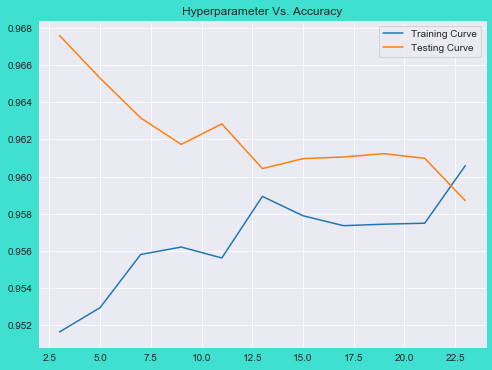

In [11]:
plt.figure(figsize = (8,6), facecolor = 'turquoise')
sb.set_style("darkgrid")
plt.plot(parameters, train_score, label = "Training Curve")
plt.plot(parameters, test_score, label = "Testing Curve")
plt.legend()
plt.title("Hyperparameter Vs. Accuracy")
plt.show()

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [13]:
parameters = {'n_neighbors': [3,5,7,9,11,13,15,17,19,21,23]}
clf_gscv = GridSearchCV(n_jobs= 4, cv = 3, estimator = KNeighborsClassifier(), scoring = 'accuracy', param_grid = parameters)
clf_gscv.fit(x_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=4,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [14]:
print(clf_gscv.best_params_)
print(clf_gscv.best_score_)

{'n_neighbors': 23}
0.958823334523228
